In [84]:
import numpy as np 
import math
import pandas as pd 
import pandas_datareader as pdr 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import sequential
from keras.layers import Dense , LSTM , Dropout
from keras.models import Sequential
plt.style.use("fivethirtyeight")
import datetime

In [85]:
# Get the stock quote
# name should be exact from yahoo finance site

df = pdr.DataReader('HDFCBANK.NS',data_source='yahoo',start='2000-01-01',end=datetime.datetime.now())

# show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,17.000000,16.600000,16.600000,17.000000,332590.0,14.458515
2000-01-04,18.344999,17.100000,18.200001,17.379999,1687100.0,14.781702
2000-01-05,17.389999,16.500000,17.000000,16.695000,1598200.0,14.199109
2000-01-06,17.000000,16.530001,16.799999,16.830000,850260.0,14.313928
2000-01-07,17.100000,16.215000,16.215000,16.834999,851440.0,14.318180
...,...,...,...,...,...,...
2022-04-06,1589.800049,1547.349976,1587.699951,1550.849976,13513930.0,1550.849976
2022-04-07,1541.349976,1513.699951,1541.300049,1516.750000,20390866.0,1516.750000
2022-04-08,1525.750000,1497.300049,1512.099976,1514.650024,20628161.0,1514.650024


In [86]:
df.shape

(5569, 6)

NameError: name 'Date' is not defined

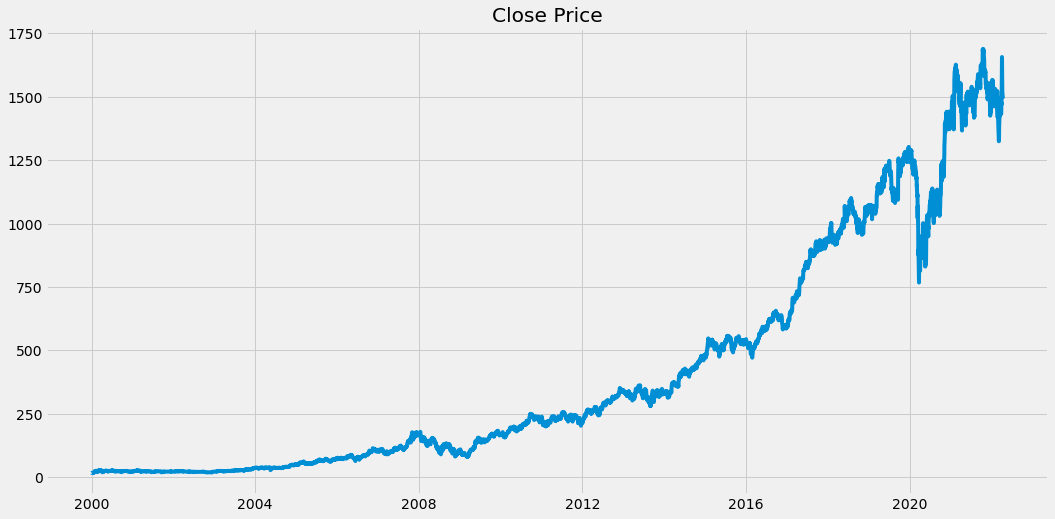

In [87]:
# visualize the closing price 
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel(xlabel = [Date], fontdict=8)
plt.xlabel(ylabel = 'Price (INR)', fontdict=8)
plt.show()

In [88]:
# defining 100day moving average
# thus it shows values from 101th index 
ma100 = df.Close.rolling(100).mean()
ma100

Date
2000-01-03            NaN
2000-01-04            NaN
2000-01-05            NaN
2000-01-06            NaN
2000-01-07            NaN
                 ...     
2022-04-06    1490.177007
2022-04-07    1489.814507
2022-04-08    1489.388507
2022-04-11    1488.870007
2022-04-12    1488.497007
Name: Close, Length: 5569, dtype: float64

In [89]:
ma200 = df.Close.rolling(200).mean()
#ma200

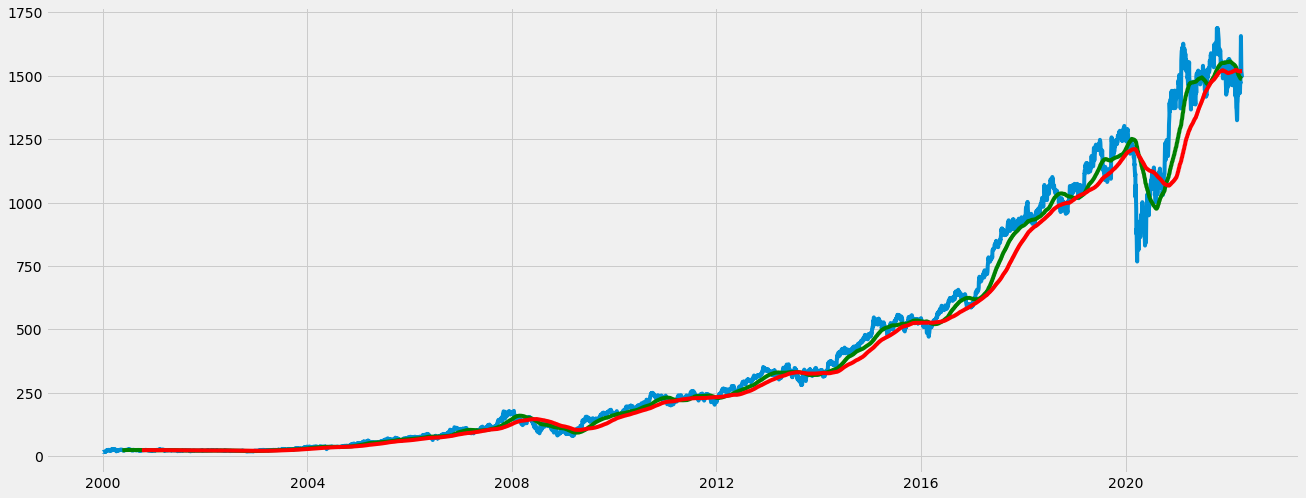

In [90]:
plt.figure(figsize=(20,8))
plt.plot(df.Close)
plt.plot(ma100,'g')
plt.plot(ma200,'r')

In [1]:
# Creating a new df for only close price 
#data = df.filter(['Close','High'])           # gives 2 column 
data = df.filter(['Close'])                   # gives 1 column
data


NameError: name 'df' is not defined

In [92]:
# create df to a  num py array         df.values : Only the values in the DataFrame will be returned, the axes labels will be removed.

dataset = data.values
dataset


array([[  17.        ],
       [  17.37999916],
       [  16.69499969],
       ...,
       [1514.65002441],
       [1496.15002441],
       [1493.5       ]])

In [93]:

# Get the no of adta to train the model on say 65%
training_data_len = math.ceil(len(dataset)*0.65)                    #Return the ceiling of x as an Integral.
training_data_len

3620

In [94]:
# scale the data 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)                        # range [0-1] on numpy array of dataset
scaled_data

array([[3.94651790e-04],
       [6.21875098e-04],
       [2.12274602e-04],
       ...,
       [8.95925559e-01],
       [8.84863347e-01],
       [8.83278746e-01]])

In [95]:
# create a scaled training data set 
train_data = scaled_data[0:training_data_len , : ]                # till row = training data len all column points

# split the data into x_train  , and y_train data sets
x_train = []                                                      # features = independent variables 
y_train = []                                                      # lables = output = dependent variables 

for i in range(90 , len(train_data)): 
    x_train.append(train_data[i-90:i , 0])                        # we are going to append 0 to 89th  values of train_data in 0th column
    y_train.append(train_data[i , 0])                             # lable/ prediction is 90th data point of 0th column from train_data to y_train
    
    if i <= 92:
        print(x_train)
        print()
        print(y_train)
       

[array([0.00039465, 0.00062188, 0.00021227, 0.000293  , 0.00029599,
       0.00014949, 0.        , 0.00012258, 0.00010165, 0.00012258,
       0.00091488, 0.00013753, 0.00093281, 0.0009089 , 0.00147994,
       0.00222141, 0.00318113, 0.00318113, 0.00396446, 0.00385683,
       0.00444581, 0.00463716, 0.00481954, 0.00374022, 0.00391961,
       0.00498099, 0.00522316, 0.0053278 , 0.00528295, 0.00410797,
       0.00418869, 0.00383889, 0.00493016, 0.00520223, 0.00473582,
       0.00435014, 0.00323794, 0.00335155, 0.00380301, 0.00380301,
       0.0038359 , 0.00319309, 0.00423055, 0.00535172, 0.00656258,
       0.00613803, 0.00566864, 0.00649681, 0.00635031, 0.00542646,
       0.00637124, 0.00609917, 0.0057673 , 0.00559389, 0.00559389,
       0.00559389, 0.00552513, 0.00584503, 0.0069961 , 0.00657753,
       0.00647588, 0.00667918, 0.00609917, 0.00592875, 0.00560884,
       0.00500789, 0.00382693, 0.00274163, 0.00174305, 0.0026639 ,
       0.0036595 , 0.00375517, 0.00416178, 0.0040691 , 0.0040

In [96]:
# convert x_train and y_train to numpy arrays so that array data can be provided to LSTM model
x_train , y_train = np.array(x_train) , np.array(y_train)

# x_train.shape               (2363, 90)   # after appending in every row tere are 90 columns of data 

# x_train                                  # is 2d type row  and column data

# reshaping the x_train data set as a LSTM model expects the input to be a three dimentionals array 
x_train = np.reshape(x_train ,newshape= (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape


(3530, 90, 1)

In [97]:
# Build the LSTM model 
model = Sequential()

# add a layer of 50 neuron , there output to be used in next layer thus return seq = true , since first layer thus shape of input neuron   , 
# input shape = (time step , features ) = (90 days , 1 ) = (90 , close price)
model.add(LSTM(50, activation ='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
 
model.add(LSTM(60, activation ='relu', return_sequences=True))
model.add(Dropout(0.3))
 
model.add(LSTM(80, activation ='relu', return_sequences=True))
model.add(Dropout(0.4)) 

model.add(LSTM(120, activation ='relu'))
model.add(Dropout(0.5))           
          
# adding last dense layer          
model.add(Dense(1))

In [98]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 90, 50)            10400     
                                                                 
 dropout_8 (Dropout)         (None, 90, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 90, 60)            26640     
                                                                 
 dropout_9 (Dropout)         (None, 90, 60)            0         
                                                                 
 lstm_12 (LSTM)              (None, 90, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 90, 80)            0         
                                                                 
 lstm_13 (LSTM)              (None, 120)              

In [100]:
# compile the model 
# optimizer is used to minimise the loss fx 
# loss fx is used to calculate what was the loss to see how well the model did on traiing 

model.compile(optimizer='adam' , loss="mean_squared_error")

# train the model
model.fit(x=x_train,y=y_train,batch_size=1,epochs=10)

Epoch 1/10
3530/3530 [==============================] - 195s 55ms/step - loss: 5.3312e-04
Epoch 2/10
3530/3530 [==============================] - 192s 54ms/step - loss: 3.9899e-04
Epoch 3/10
3530/3530 [==============================] - 218s 62ms/step - loss: 3.7260e-04
Epoch 4/10
3530/3530 [==============================] - 237s 67ms/step - loss: 3.5428e-04
Epoch 5/10
3530/3530 [==============================] - 223s 63ms/step - loss: 2.9067e-04
Epoch 6/10
3530/3530 [==============================] - 227s 64ms/step - loss: 2.8514e-04
Epoch 7/10
3530/3530 [==============================] - 212s 60ms/step - loss: 2.7049e-04
Epoch 8/10
3530/3530 [==============================] - 197s 56ms/step - loss: 2.6718e-04
Epoch 9/10
3530/3530 [==============================] - 196s 56ms/step - loss: 2.7001e-04
Epoch 10/10
3530/3530 [==============================] - 196s 56ms/step - loss: 2.6952e-04


In [105]:
model.save('HDFCBANK.NS_keras_model.h5')

In [106]:
# creating the testing data set
# create a new array containing scaled values from index  end of len(train_data) till end of the total data

test_data = scaled_data[training_data_len-90 : , : ]         # all data from 60th to end of data with all column

# creating a dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len : , : ]                          # actual prediction values
                                                                    # dataset values are original closing prce and not scaled

for i in range(90 , len(test_data)):
    x_test.append(test_data[i-90 : i, 0 ])
    

In [107]:
len(y_test)

1949

In [108]:
# create the data to a numpy array as model need 3d array
x_test = np.array(x_test)

# reshape the data for the model      (newshape =no of rows = x_test.shape[0], timesteps = 60 days = x_test.shape[1] , and 1 )
x_test = np.reshape(x_test , newshape= (x_test.shape[0] , x_test.shape[1] , 1 ))

In [109]:
                                                            # Get the models predicted values
y_predictions = model.predict(x_test)    # scaled value

y_predictions.shape

(1949, 1)

In [110]:
# undo scaling
                                                           # we want the predictions to be exact same as real lables 
y_predictions = scaler.inverse_transform(y_predictions)        # Undo the scaling of X according to feature_range(0-1)
                                                           # gaining back the real value

In [111]:
y_predictions

array([[ 332.5281 ],
       [ 334.0462 ],
       [ 335.52267],
       ...,
       [5587.894  ],
       [3123.4062 ],
       [4185.3003 ]], dtype=float32)

In [112]:
# EVALUATE THE MODEL root mean square error (RMSE)
# its a measure of how good the model predicts the response 
# can be compared by std deviation less
# lower value of rmse is better : try diff range of dataset 

rmse = np.sqrt(np.mean(y_predictions - y_test)**2)
rmse


189.71760622304546

C:\Users\Admin\AppData\Local\Temp/ipykernel_720/1944950810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = y_predictions                       # valid(prediction) = y_prediction


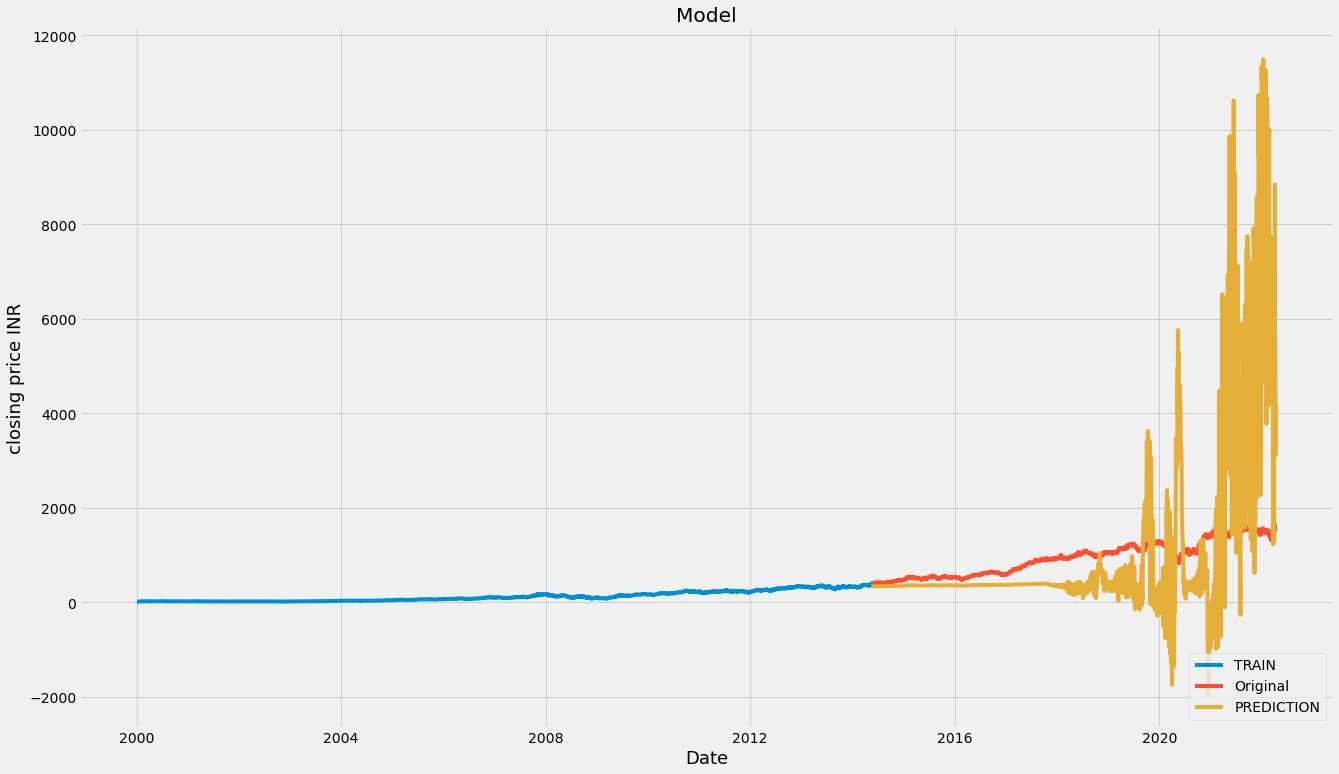

In [113]:
# plot the data
train = data[ : training_data_len]                              # train = x_train
valid = data[training_data_len : ]                              # valid = y_test                
valid['predictions'] = y_predictions                       # valid(prediction) = y_prediction

# visualise the model 
plt.figure(figsize=(20,12))
plt.title('Model')
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('closing price INR' , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['TRAIN' , 'Original' , 'PREDICTION'] , loc= 'lower right')
plt.show()


In [114]:
# show the valid and predicted price
valid

,Close,predictions
Date,,
2014-05-19,405.950012,332.528107
2014-05-20,408.024994,334.046204
2014-05-21,404.750000,335.522675
2014-05-22,401.299988,336.872650
2014-05-23,394.825012,338.007416
...,...,...
2022-04-06,1550.849976,8846.293945
2022-04-07,1516.750000,5711.945801
2022-04-08,1514.650024,5587.894043


In [115]:
valid.tail(30)

,Close,predictions
Date,,
2022-02-28,1426.250000,6246.297363
2022-03-02,1374.250000,6982.979492
2022-03-03,1371.000000,6826.387207
2022-03-04,1366.500000,6081.191895
2022-03-07,1324.800049,6448.166016
2022-03-08,1327.800049,7745.979492
2022-03-09,1371.150024,5807.709473
2022-03-10,1392.699951,6072.029785
2022-03-11,1396.800049,6063.596191


# future prediction

In [2]:
# Get the quotes
hdfcbank_quote = web.DataReader('HDFCBANK.NS',data_source='yahoo',start='2000-01-01',end=(datetime.datetime.now() + timedelta(days=1)))
# create a new dataframe 
new_df = hdfcbank_quote.filter(['Close'])
# Get the last 60days closing price value and convert the data form tp numpy array
last_90days = new_df[-90 :].values
# Scale the data as per previous tramsformation made
last_90days_scaled = scaler.transform(last_90days)     # here not using fit.transform because we want to transform by using same last value ranges thus not creating new one
# create an empty list 
X_TEST = []
# Append last 90 days 
X_TEST.append(last_90days_scaled)
# convert the X_TEST  to a numpy array
X_TEST = np.array(X_TEST)
# Reshape the data for LSTM model 
X_TEST = np.reshape(X_TEST , newshape= (X_TEST.shape[0] ,X_TEST.shape[1] , 1 ))   # last is 1 because 1 feature of close price is required
# Get the predicted scaled price 
pred_price = model.predict(X_TEST)
# Undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
pred_price


NameError: name 'web' is not defined

In [ ]:
# actual price
start_date = (datetime.datetime.now())
end_date = (datetime.datetime.now())
hdfcbank_actual = web.DataReader('HDFCBANK.NS',data_source='yahoo',start= start_date,end=end_date)
hdfcbank_actual['Close']